# The Kolmogorov-Smirnov Test - Lab

## Introduction
In the previous lesson, we saw that the Kolmogorov–Smirnov statistic quantifies a distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution, or between the empirical distribution functions of two samples. In this lab, we shall see how to perform this test in Python. 

## Objectives

In this lab you will:

- Calculate a one- and two-sample Kolmogorov-Smirnov test
- Interpret the results of a one- and two-sample Kolmogorov-Smirnov test
- Compare K-S test to visual approaches for testing for normality assumption

### Data

Let's import the necessary libraries and generate some data. Run the following cell: 

In [17]:
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# Create the normal random variables with mean 0, and sd 3
x_10 = stats.norm.rvs(loc=0, scale=3, size=10)
x_50 = stats.norm.rvs(loc=0, scale=3, size=50)
x_100 = stats.norm.rvs(loc=0, scale=3, size=100)
x_1000 = stats.norm.rvs(loc=0, scale=3, size=1000)

### Plots 

Plot histograms and Q-Q plots of above datasets and comment on the output 

- How good are these techniques for checking normality assumptions?
- Compare both these techniques and identify their limitations/benefits etc. 


x_10


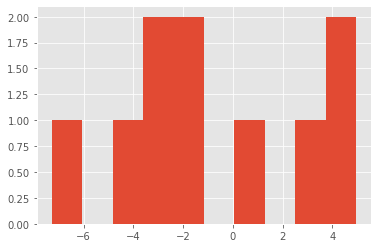

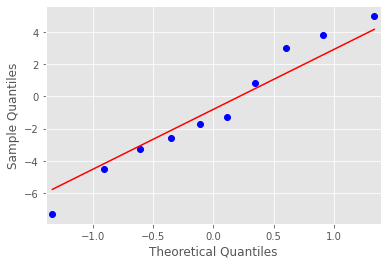

x_50


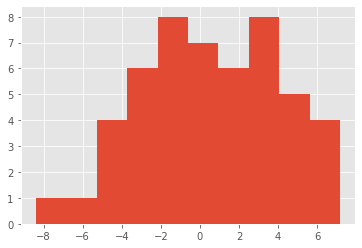

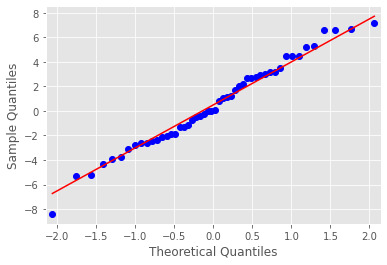

x_100


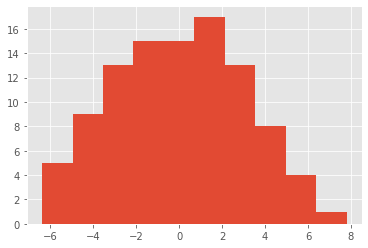

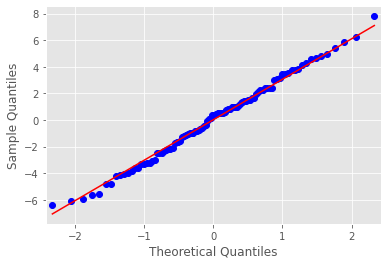

x_1000


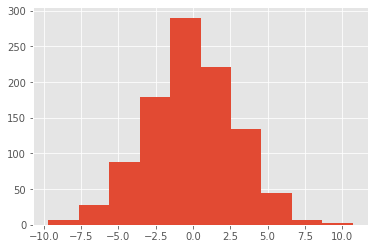

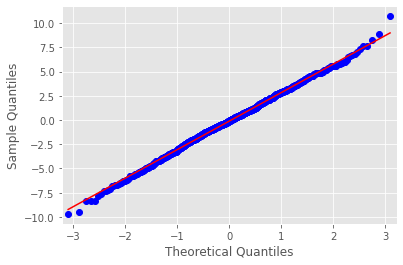

In [18]:
# Plot histograms and Q-Q plots for above datasets
labels = ['x_10', 'x_50', 'x_100', 'x_1000']

for ind, i in enumerate([x_10, x_50, x_100, x_1000]):
    print(labels[ind])
    plt.hist(i)
    sm.qqplot(i, line='s')
    plt.show()

In [ ]:
# Your comments here 
# Histograms are helpful looking specfically at symmetry, skewness, kurtosis, and outliers.
# They can sometimes show when data are clearly not normally distributed, but are not the best visual 
#    method for this.

# Q-Q plots gives a reference line to compare against, so they can more clearly show if data are not 
#    very normally distributed (line represents normal distribution - basically sample quantiles should 
#    match up well against the theoretical quantiles which are the quantiles for a normal distribution).

### Create a function to plot the normal CDF and ECDF for a given dataset
- Create a function to generate an empirical CDF from data
- Create a normal CDF using the same mean = 0 and sd = 3, having the same number of values as data

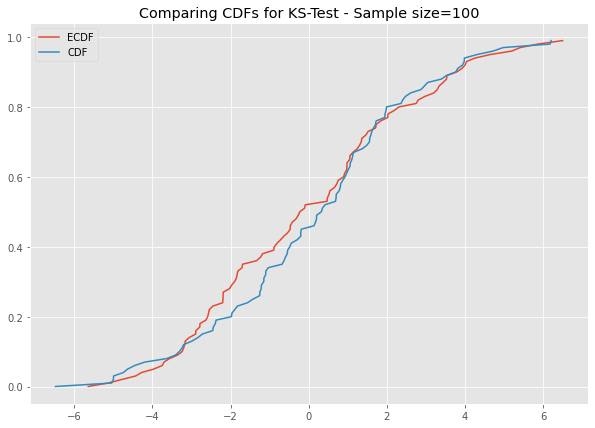

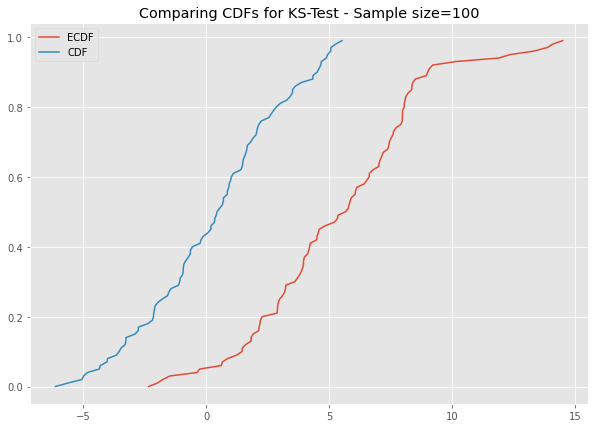

In [19]:
# You code here 

def ks_plot(data):

    plt.figure(figsize=(10,7))
    plt.plot(np.sort(data), np.linspace(0, 1, len(data), endpoint=False))
    plt.plot(np.sort(stats.norm.rvs(loc=0, scale=3, size=len(data))), np.linspace(0, 1, len(data),
                                                                                  endpoint=False))
    
    plt.legend(['ECDF', 'CDF'])
    plt.title('Comparing CDFs for KS-Test - Sample size={}'.format(len(data)))
    
# Uncomment below to run the test
ks_plot(stats.norm.rvs(loc=0, scale=3, size=100)) 
ks_plot(stats.norm.rvs(loc=5, scale=4, size=100))


This is awesome. The difference between the two CDFs in the second plot shows that the sample did not come from the distribution which we tried to compare it against. 

Now you can run all the generated datasets through the function `ks_plot()` and comment on the output.

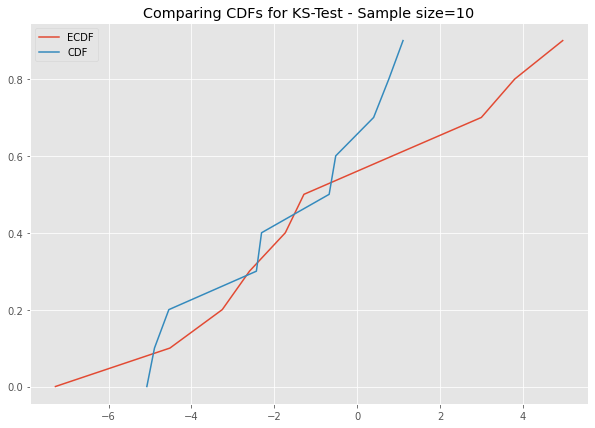

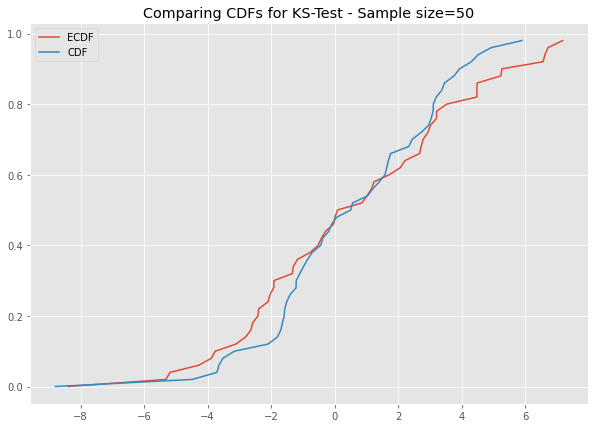

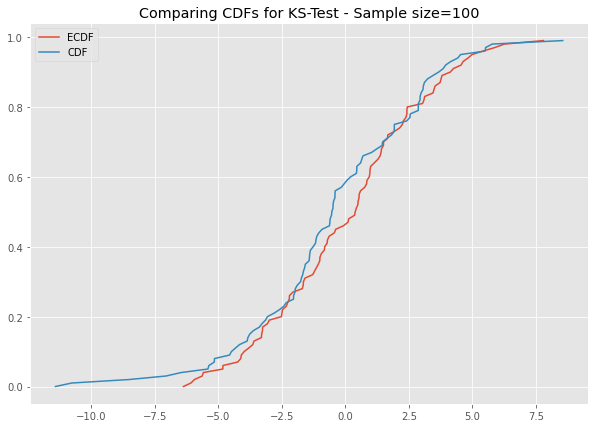

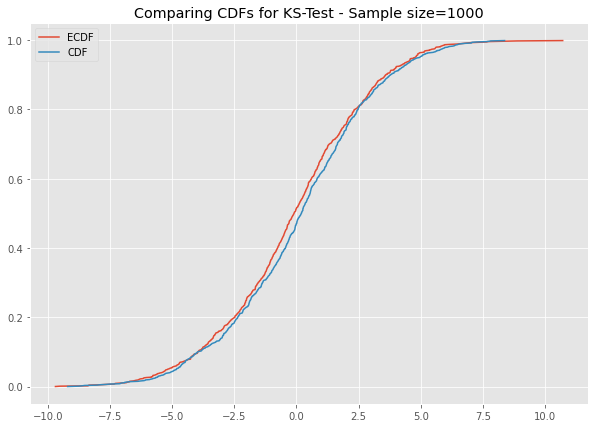

In [20]:
ks_plot(x_10)
ks_plot(x_50)
ks_plot(x_100)
ks_plot(x_1000)

In [ ]:
# Clearly approximates normal distribution more closely as sample size increases (with more sample to 
#    compare, get a clearer picture that the samples really were generated from a normal distr)
# Randomness in smaller sample sizes makes it more likely that test statistic d (measure of maximum 
#    vertical distance between the distr's) would be high and would falsely reject null hypothesis that 
#    distr of the data is normal.

### K-S test in SciPy

Let's run the Kolmogorov-Smirnov test, and use some statistics to get a final verdict on normality. We will test the hypothesis that the sample is a part of the standard t-distribution. In SciPy, we run this test using the function below:

```python
scipy.stats.kstest(rvs, cdf, args=(), N=20, alternative='two-sided', mode='approx')
```
Details on arguments being passed in can be viewed at this [link to the official doc.](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html)

Run the K-S test for normality assumption using the datasets created earlier and comment on the output: 
- Perform the K-S test against a normal distribution with mean = 0 and sd = 3
- If p < .05 we can reject the null hypothesis and conclude our sample distribution is not identical to a normal distribution 

In [21]:
# Perform K-S test 
np.random.seed(999)
for i in [x_10, x_50, x_100, x_1000]:
    print(stats.kstest(i, 'norm', args=(0,3)))

# KstestResult(statistic=0.1377823669421559, pvalue=0.9913389045954595)
# KstestResult(statistic=0.13970573965633104, pvalue=0.2587483380087914)
# KstestResult(statistic=0.0901015276393986, pvalue=0.37158535281797134)
# KstestResult(statistic=0.030748345486274697, pvalue=0.29574612286614443)

KstestResult(statistic=0.26600659533449167, pvalue=0.4096560494497098)
KstestResult(statistic=0.15345664744320164, pvalue=0.17093903101080468)
KstestResult(statistic=0.05805442845335318, pvalue=0.8889484539931447)
KstestResult(statistic=0.032798269969783744, pvalue=0.22758935655525234)


In [ ]:
# P-value > 0.05 for all samples, so fail to reject the null that the distributions are the same
# (being a normal distribution with mean = 0 and sd = 3)

Generate a uniform distribution and plot / calculate the K-S test against a uniform as well as a normal distribution: 

In [22]:
x_uni = np.random.rand(1000)
# Try with a uniform distribution
print(stats.kstest(x_uni, lambda x: x))
print(stats.kstest(x_uni, 'norm', args=(0,3)))
# KstestResult(statistic=0.023778383763166322, pvalue=0.6239045200710681)
# KstestResult(statistic=0.5000553288071681, pvalue=0.0)

KstestResult(statistic=0.022666444380263384, pvalue=0.6831574447129525)
KstestResult(statistic=0.5000726911533943, pvalue=9.01866500220475e-232)


In [ ]:
# The p-value of the first test > 0.05, so fail to reject the null
# and conclude that the sample is from a uniform distribution.
# The p-value of the second test < 0.05, so reject the null that the sample came from a normal distr
#   with mean = 0 and sd = 3 (we know it came from a uniform distr)

## Two-sample K-S test

A two-sample K-S test is available in SciPy using following function: 

```python 
scipy.stats.ks_2samp(data1, data2)[source]
```

Let's generate some bi-modal data first for this test: 

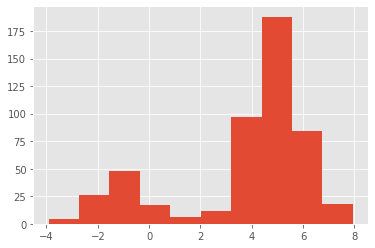

In [36]:
# Generate binomial data
N = 1000
x_1000_bi = np.concatenate((np.random.normal(-1, 1, int(0.1 * N)), np.random.normal(5, 1, int(0.4 * N))))[:, np.newaxis]
plt.hist(x_1000_bi);

In [37]:
x_1000_bi.shape

(500, 1)

In [38]:
x_1000_bi

array([[-1.07114322],
       [-1.0623119 ],
       [-1.54101891],
       [-0.53276164],
       [-0.87726396],
       [ 0.49367441],
       [-1.27945349],
       [-1.17892443],
       [-3.17401008],
       [-1.34408434],
       [-1.60973652],
       [-2.50238739],
       [ 0.19160305],
       [ 0.82106803],
       [-0.55620359],
       [-1.11681299],
       [-1.7822949 ],
       [-0.55648182],
       [ 0.66343921],
       [-1.29663349],
       [-1.6958597 ],
       [-1.59628219],
       [-1.91927336],
       [ 0.72730066],
       [-1.57169107],
       [-0.50347508],
       [-1.07108579],
       [ 0.87601778],
       [-2.5865653 ],
       [ 0.7640944 ],
       [ 0.47393588],
       [-1.16243174],
       [-2.17128127],
       [-0.90216725],
       [-0.93469244],
       [-1.48431505],
       [-1.17382484],
       [-0.39133007],
       [-1.88004768],
       [ 0.81121624],
       [-1.9216894 ],
       [-2.47905749],
       [-0.89329919],
       [ 0.06600767],
       [-1.18948459],
       [-1

In [40]:
x_1000_bi[:,0]

array([-1.07114322, -1.0623119 , -1.54101891, -0.53276164, -0.87726396,
        0.49367441, -1.27945349, -1.17892443, -3.17401008, -1.34408434,
       -1.60973652, -2.50238739,  0.19160305,  0.82106803, -0.55620359,
       -1.11681299, -1.7822949 , -0.55648182,  0.66343921, -1.29663349,
       -1.6958597 , -1.59628219, -1.91927336,  0.72730066, -1.57169107,
       -0.50347508, -1.07108579,  0.87601778, -2.5865653 ,  0.7640944 ,
        0.47393588, -1.16243174, -2.17128127, -0.90216725, -0.93469244,
       -1.48431505, -1.17382484, -0.39133007, -1.88004768,  0.81121624,
       -1.9216894 , -2.47905749, -0.89329919,  0.06600767, -1.18948459,
       -1.91323783, -1.22678907, -0.65926466,  0.2249093 , -0.89881169,
        0.88313534, -1.06724097, -1.91655441, -1.59980708, -2.68086087,
       -1.03835437, -1.22519601,  0.75206533, -2.83018131, -1.37868262,
        1.15517164, -0.04675776, -0.90886753, -1.34770373, -1.73179875,
       -1.09957908, -1.87775546, -1.4094273 , -1.06731936, -0.38

Plot the CDFs for `x_1000_bimodal` and `x_1000` and comment on the output. 

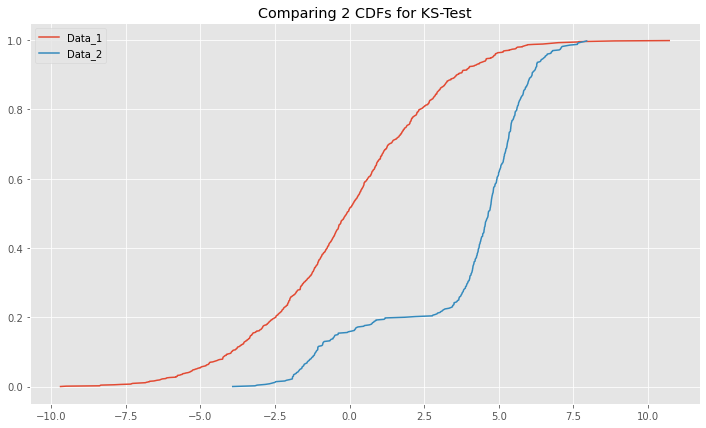

In [39]:
# Plot the CDFs
def ks_plot_2sample(data_1, data_2):
    '''
    Data entered must be the same size.
    '''
    #length = len(data_1)
    plt.figure(figsize=(12, 7))
    plt.plot(np.sort(data_1), np.linspace(0, 1, len(data_1), endpoint=False))
    plt.plot(np.sort(data_2), np.linspace(0, 1, len(data_2), endpoint=False))
    plt.legend('top right')
    plt.legend(['Data_1', 'Data_2'])
    plt.title('Comparing 2 CDFs for KS-Test')

# Uncomment below to run
ks_plot_2sample(x_1000, x_1000_bi[:,0])


In [ ]:
# The two distributions are not very close, so test statistic d of KS-Test will probably be high
# leading us to reject the null hypothesis that the 2 distr's are identical

Run the two-sample K-S test on `x_1000` and `x_1000_bi` and comment on the results. 

In [42]:
stats.ks_2samp(x_1000, x_1000_bi[:,0])

# Ks_2sampResult(statistic=0.633, pvalue=4.814801487740621e-118)

Ks_2sampResult(statistic=0.66, pvalue=2.9976021664879227e-15)

In [ ]:
# p-value is very small, so reject the null, the 2 samples belong to diff distr's

## Summary

In this lesson, we saw how to check for normality (and other distributions) using one- and two-sample K-S tests. You are encouraged to use this test for all the upcoming algorithms and techniques that require a normality assumption. We saw that we can actually make assumptions for different distributions by providing the correct CDF function into Scipy K-S test functions. 